London Bike Ride Behavior and Anamoly Behavior EDA
Dataset Type: Bike Trip Logs (Raw Transport Data)
Domain: Urban Mobility + Demand Analytics

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Datasets/429JourneyDataExtract01Oct2025-15Oct2025.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431748 entries, 0 to 431747
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Number                431748 non-null  int64 
 1   Start date            431748 non-null  object
 2   Start station         431748 non-null  object
 3   Start station number  431748 non-null  int64 
 4   End date              431748 non-null  object
 5   End station           431748 non-null  object
 6   End station number    431748 non-null  int64 
 7   Bike number           431748 non-null  int64 
 8   Bike model            431748 non-null  object
 9   Total duration        431748 non-null  object
 10  Total duration (ms)   431748 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 36.2+ MB


,Number,Start date,Start station,Start station number,End date,End station,End station number,Bike number,Bike model,Total duration,Total duration (ms)
0,153051719,2025-10-15 23:59,"Gloucester Road Station, South Kensington",1107,2025-10-16 00:02,"Drayton Gardens, West Chelsea",200060,21145,CLASSIC,3m 43s,223233
1,153051720,2025-10-15 23:59,"Hop Exchange, The Borough",960,2025-10-16 00:17,"Battersea Park Road, Nine Elms",200183,55937,CLASSIC,17m 49s,1069184
2,153051721,2025-10-15 23:59,"Lambeth Palace Road, Waterloo",300231,2025-10-16 00:17,"Lambeth Palace Road, Waterloo",300231,52917,CLASSIC,18m 26s,1106396
3,153051722,2025-10-15 23:59,"Vereker Road, West Kensington",200116,2025-10-16 00:02,"Greyhound Road, Hammersmith",200215,50274,CLASSIC,3m 14s,194482
4,153051723,2025-10-15 23:59,"Vereker Road, West Kensington",200116,2025-10-16 00:02,"Greyhound Road, Hammersmith",200215,54406,CLASSIC,3m 9s,189723


In [4]:
missing  = df.isnull().sum()
print(missing[missing>0] if missing.sum()>0 else "No missing values")

No missing values


In [5]:
df["Start date"] = pd.to_datetime(df["Start date"])
df["End date"] = pd.to_datetime(df["End date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431748 entries, 0 to 431747
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Number                431748 non-null  int64         
 1   Start date            431748 non-null  datetime64[ns]
 2   Start station         431748 non-null  object        
 3   Start station number  431748 non-null  int64         
 4   End date              431748 non-null  datetime64[ns]
 5   End station           431748 non-null  object        
 6   End station number    431748 non-null  int64         
 7   Bike number           431748 non-null  int64         
 8   Bike model            431748 non-null  object        
 9   Total duration        431748 non-null  object        
 10  Total duration (ms)   431748 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(4)
memory usage: 36.2+ MB


In [6]:
df["Number"].shape[0]

431748

In [7]:
df["Start station"]= df["Start station"].str.strip()
df["End station"] = df["End station"].str.strip()

In [8]:
df["duration_min"] = df["Total duration (ms)"]/60000
print(df["duration_min"])

0          3.720550
1         17.819733
2         18.439933
3          3.241367
4          3.162050
            ...    
431743    10.353183
431744    13.332917
431745     5.789050
431746    10.654933
431747    16.594067
Name: duration_min, Length: 431748, dtype: float64


Now we take into account that some rides are having very less duration which raises suspision if they are actually the official rides , so lets remove the suspicious ride

In [9]:
df["duration_min"].describe()

count    431748.000000
mean         20.337706
std         183.277002
min           0.015317
25%           7.818021
50%          13.251267
75%          21.069092
max       24042.685667
Name: duration_min, dtype: float64

Lets check what are the longest and shortest trips are and check for the outliers


In [10]:
Q1 = df["duration_min"].quantile(0.25)
Q3 = df["duration_min"].quantile(0.75)
IQR = Q3-Q1

lower = Q1 - 1.5*IQR
upper = Q3 +1.5*IQR

In [11]:
outliers = df[(df["duration_min"]<lower) | (df["duration_min"]>upper)]

In [12]:
print(f"Q1:{Q1} min")
print(f"Q3:{Q3} min")
print(f"Upper Bound:{upper} min")
print(f"lower Bound:{lower} min")
print("Total Outliers Trips:",outliers.shape[0])

Q1:7.818020833333334 min
Q3:21.06909166666667 min
Upper Bound:40.945697916666674 min
lower Bound:-12.058585416666668 min
Total Outliers Trips: 20525


In [13]:
outliers.sort_values("duration_min",ascending = False).head(5)[
      ["Start station","End station","duration_min","Total duration"]
]

,Start station,End station,duration_min,Total duration
367212,"Craven Street, Strand","Bridge Avenue, Hammersmith",24042.685667,16d 16h 42m 41s
355058,"Parsons Green Station, Parsons Green","Stanley Grove, Battersea",20172.709317,14d 0h 12m 42s
239986,"Clarendon Road, Avondale","Freston Road, Avondale",19813.046283,13d 18h 13m 2s
238669,"Sheepcote Lane, Battersea","Ashley Crescent, Battersea",19260.656683,13d 9h 0m 39s
93620,"Wardour Street, Soho","Tachbrook Street, Victoria",18791.732983,13d 1h 11m 43s


In [14]:
df.sort_values("duration_min",ascending = True).head(10)[
      ["Start station","End station","duration_min","Total duration"]
    ]

,Start station,End station,duration_min,Total duration
123078,"Tanner Street, Bermondsey","Tanner Street, Bermondsey",0.015317,0s
42356,"Finsbury Circus, Liverpool Street","Finsbury Circus, Liverpool Street",0.019950,1s
176318,"Newgate Street , St. Paul's","Newgate Street , St. Paul's",0.035067,2s
195159,"Ormonde Gate, Chelsea","Ormonde Gate, Chelsea",0.036883,2s
276560,"Great Tower Street, Monument","Great Tower Street, Monument",0.036950,2s
162407,"Hereford Road, Bayswater","Hereford Road, Bayswater",0.037100,2s
331647,"Battersea Park Road, Nine Elms","Battersea Park Road, Nine Elms",0.037217,2s
145067,"Abingdon Green, Westminster","Abingdon Green, Westminster",0.037467,2s
142699,"Tavistock Street, Covent Garden","Tavistock Street, Covent Garden",0.037500,2s
178927,"Finsbury Circus, Liverpool Street","Finsbury Circus, Liverpool Street",0.037517,2s


In [15]:
print("Trips 1–10 min:", ((df["duration_min"] > 1) & (df["duration_min"] <= 10)).sum())
print("Trips 10-40 min:", ((df["duration_min"] > 10) & (df["duration_min"] <= 40)).sum())
print("Trips 41–120 min:", ((df["duration_min"] > 41) & (df["duration_min"] <= 120)).sum())
print("Trips 120–300 min:", ((df["duration_min"] > 120) & (df["duration_min"] <= 300)).sum())
print("Trips >300 min:", (df["duration_min"] > 300).sum())


Trips 1–10 min: 150719
Trips 10-40 min: 255901
Trips 41–120 min: 18664
Trips 120–300 min: 1160
Trips >300 min: 637


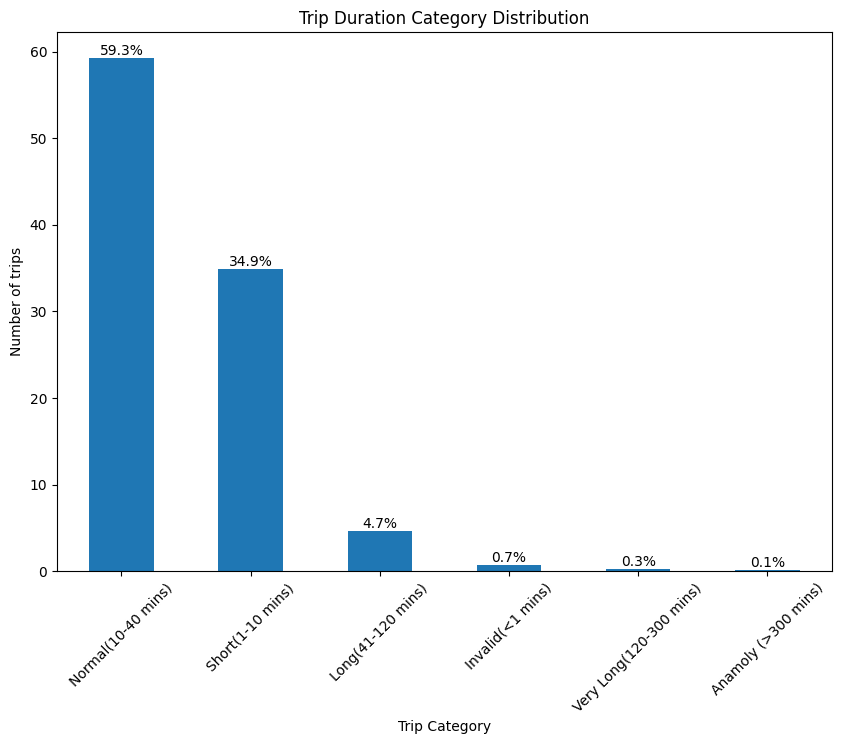

In [16]:
Cbins = [0,1,10,40,120,300,float("inf")]
labels =[
    "Invalid(<1 mins)",
    "Short(1-10 mins)",
    "Normal(10-40 mins)",
    "Long(41-120 mins)",
    "Very Long(120-300 mins)",
    "Anamoly (>300 mins)"
]

df["trip_category"] = pd.cut(df["duration_min"],bins=Cbins,labels =labels)

counts = df["trip_category"].value_counts()
percent = counts / counts.sum() * 100

plt.figure(figsize=(10,7))
ax = percent.plot(kind="bar")
plt.title("Trip Duration Category Distribution")
plt.xlabel("Trip Category")
plt.ylabel("Number of trips")
plt.xticks(rotation=45)
for i, value in enumerate(percent.values):
    ax.text(i, value + 0.3, f"{value:.1f}%", ha="center")
plt.show()


In [17]:
category_summary = df["trip_category"].value_counts().reset_index()
category_summary.columns = ["Trip Category","Trips"]

category_summary["Percent"] = (category_summary["Trips"] / category_summary["Trips"].sum()) * 100
category_summary.style.format({"Percent": "{:.2f}%"}).bar(subset=["Percent"])

,Trip Category,Trips,Percent
0,Normal(10-40 mins),255901,59.27%
1,Short(1-10 mins),150719,34.91%
2,Long(41-120 mins),20169,4.67%
3,Invalid(<1 mins),3162,0.73%
4,Very Long(120-300 mins),1160,0.27%
5,Anamoly (>300 mins),637,0.15%


In [18]:
df.head()

,Number,Start date,Start station,Start station number,End date,End station,End station number,Bike number,Bike model,Total duration,Total duration (ms),duration_min,trip_category
0,153051719,2025-10-15 23:59:00,"Gloucester Road Station, South Kensington",1107,2025-10-16 00:02:00,"Drayton Gardens, West Chelsea",200060,21145,CLASSIC,3m 43s,223233,3.720550,Short(1-10 mins)
1,153051720,2025-10-15 23:59:00,"Hop Exchange, The Borough",960,2025-10-16 00:17:00,"Battersea Park Road, Nine Elms",200183,55937,CLASSIC,17m 49s,1069184,17.819733,Normal(10-40 mins)
2,153051721,2025-10-15 23:59:00,"Lambeth Palace Road, Waterloo",300231,2025-10-16 00:17:00,"Lambeth Palace Road, Waterloo",300231,52917,CLASSIC,18m 26s,1106396,18.439933,Normal(10-40 mins)
3,153051722,2025-10-15 23:59:00,"Vereker Road, West Kensington",200116,2025-10-16 00:02:00,"Greyhound Road, Hammersmith",200215,50274,CLASSIC,3m 14s,194482,3.241367,Short(1-10 mins)
4,153051723,2025-10-15 23:59:00,"Vereker Road, West Kensington",200116,2025-10-16 00:02:00,"Greyhound Road, Hammersmith",200215,54406,CLASSIC,3m 9s,189723,3.162050,Short(1-10 mins)


Lets make a df_main where we have trips between 1 and 300 mins which contains only realistic customers.


In [19]:
df_main = df[(df["duration_min"] >= 1) & (df["duration_min"] <= 300)].copy()
df_invalid = df[df["duration_min"]<1].copy()
df_anomaly = df[df["duration_min"]>300].copy()

print("Total trips:", df.shape[0])
print("Valid trips:", df_main.shape[0])
print("Invalid trips (<1 min):", df_invalid.shape[0])
print("Anomaly trips (>300 min):", df_anomaly.shape[0])

Total trips: 431748
Valid trips: 427949
Invalid trips (<1 min): 3162
Anomaly trips (>300 min): 637


Trips shorter than 1 minute were treated as invalid docking events.
Trips longer than 300 minutes were flagged as anomalies.
All behavioral and demand-based analysis is performed on the cleaned dataset (df_main).

In [20]:
print(df_main.duplicated().sum())

0


In [21]:
df_main["start_hour"] = df_main["Start date"].dt.hour
df_main["end_hour"]=df_main["End date"].dt.hour
df_main["start_day"]= df_main["Start date"].dt.day_name()
df_main["start_month"]=df_main["Start date"].dt.month_name()

df_main["is_weekend"] = df_main["start_day"].isin(["Saturday","Sunday"])

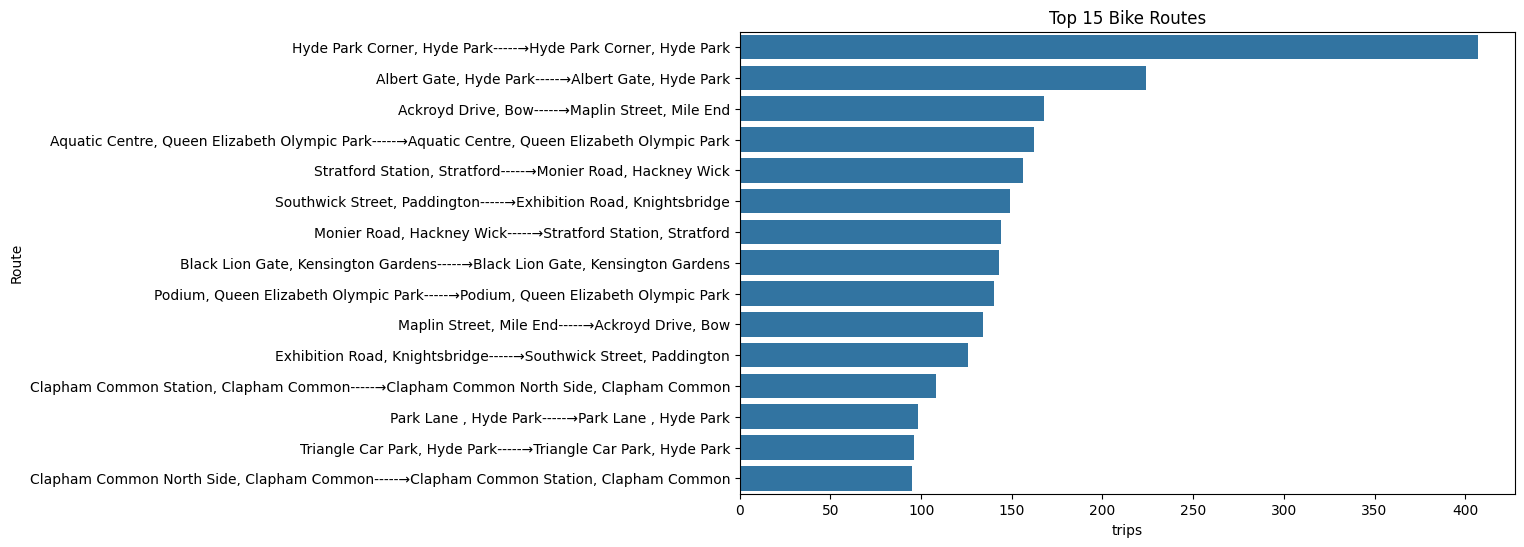

In [24]:
top_routes = df_main.groupby(["Start station","End station"]).size().sort_values(ascending=False).head(100)

top_routes_df = top_routes.reset_index()
top_routes_df.columns=["Start station","End station","trips"]
top_routes_df["Route"] = ( top_routes_df["Start station"]+"-----→"+top_routes_df["End station"])

plt.figure(figsize=(10,6))
sns.barplot(
    data=top_routes_df.head(15),
    x="trips",
    y="Route"
)
plt.title("Top 15 Bike Routes")
plt.show()

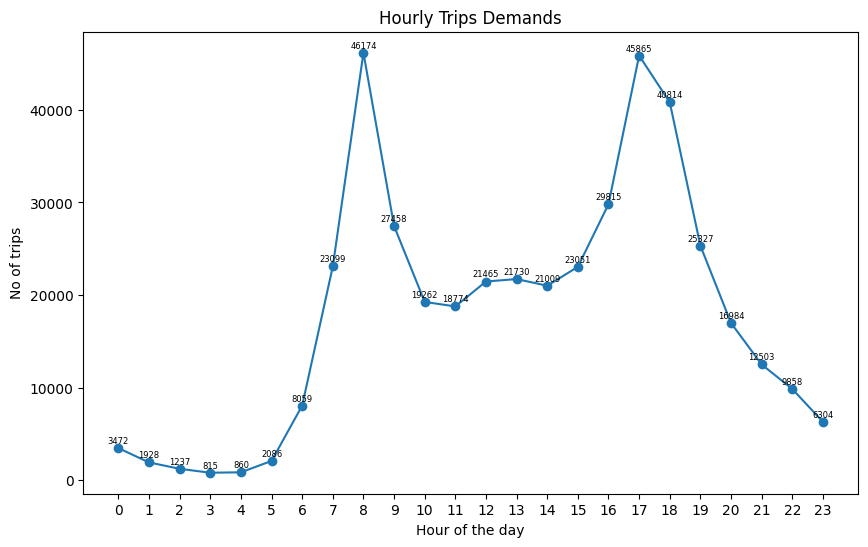

In [34]:
hourly_demand = df_main.groupby("start_hour").size().reset_index()
hourly_demand.columns = ["Start Hour","Trips"]

plt.figure(figsize=(10,6))
plt.plot(hourly_demand["Start Hour"],hourly_demand["Trips"],marker="o")

for i in range(len(hourly_demand)):
    x = hourly_demand["Start Hour"][i]
    y = hourly_demand["Trips"][i]

    plt.text(x,y+500,str(y),ha="center",fontsize=6)



plt.title("Hourly Trips Demands")
plt.xlabel("Hour of the day")
plt.ylabel("No of trips")
plt.xticks(range(0,24))
plt.show()

Text(0.5, 1.0, 'Weekend vs Weekdays Demand')

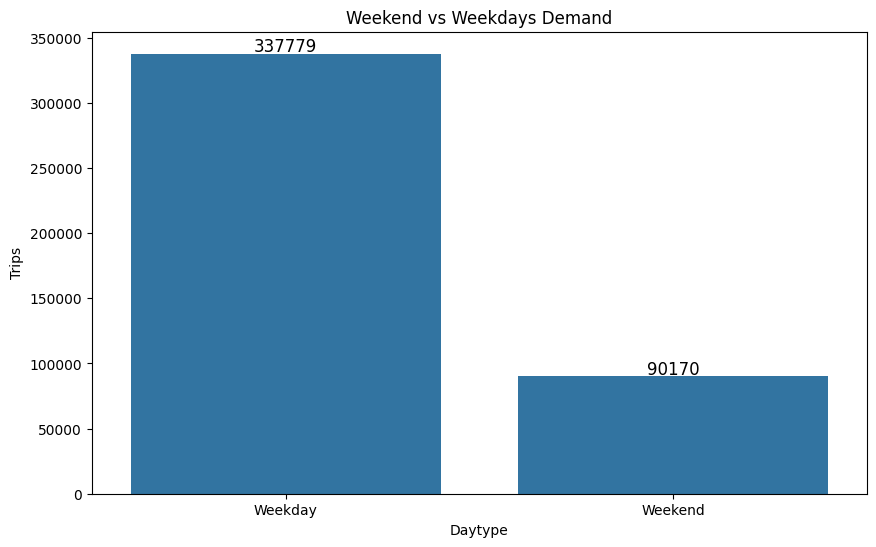

In [49]:
df_main["day_type"]=df_main["is_weekend"].map({
    False:"Weekday",
    True:"Weekend"
})

weekend_summary = df_main["day_type"].value_counts().reset_index()
weekend_summary.columns=["Daytype","Trips"]

plt.figure(figsize=(10,6))

sns.barplot(data= weekend_summary,x="Daytype",y="Trips")
for i in range(len(weekend_summary)):
    x = weekend_summary["Daytype"][i]
    y= weekend_summary["Trips"][i]
    plt.text(x,y+1500,str(y),ha="center",fontsize=12)
plt.title("Weekend vs Weekdays Demand")

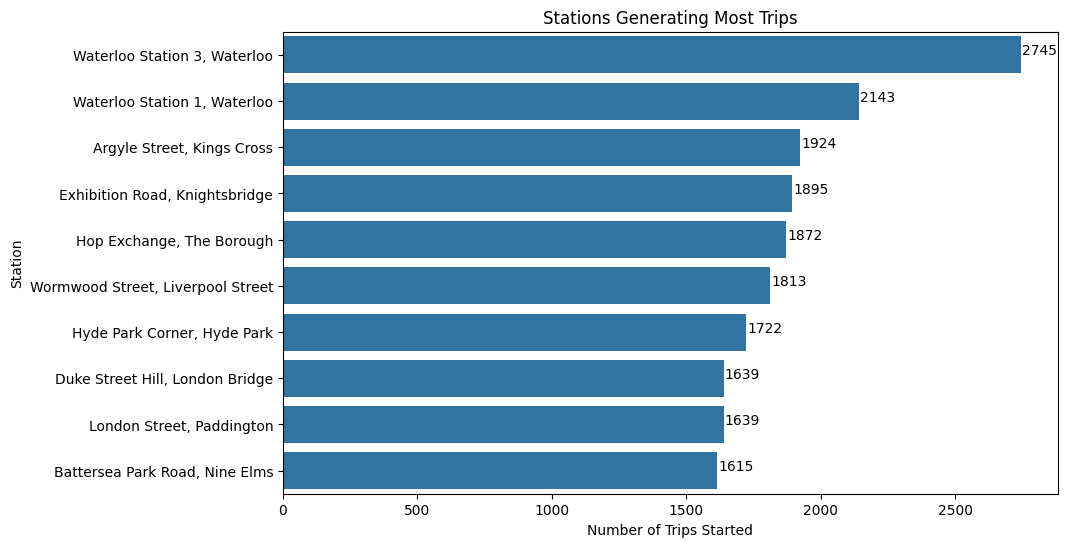

In [70]:
top_stations = df_main["Start station"].value_counts().head(10).reset_index()
top_stations.columns = ["Start Station","Trips"]

plt.figure(figsize=(10,6))
sns.barplot(data = top_stations,x="Trips",y="Start Station",orient="h")

for i in range(len(top_stations)):
    x = top_stations["Trips"][i]
    y = top_stations["Start Station"][i]
    plt.text(x+70,y,str(x),ha="center",fontsize=10)
    
plt.title("Stations Generating Most Trips")
plt.xlabel("Number of Trips Started")
plt.ylabel("Station")
plt.show()

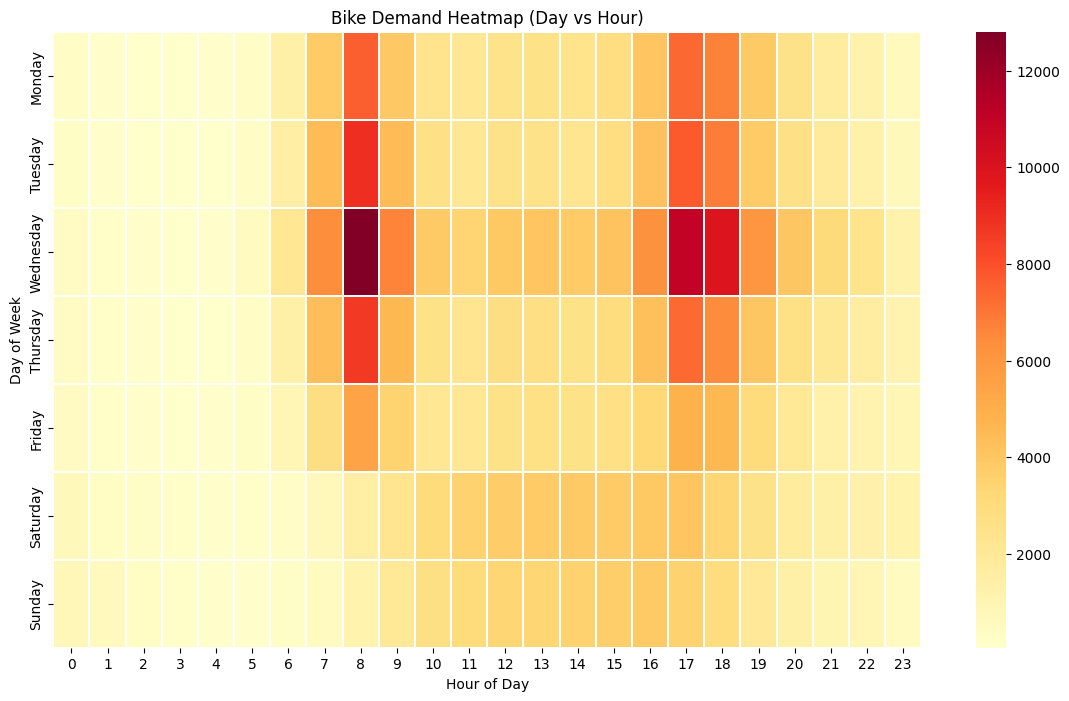

In [74]:
heatmap_data = df_main.pivot_table(
    index = "start_day",
    columns="start_hour",
    values="duration_min",
    aggfunc="count"
)

day_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
heatmap_data=heatmap_data.reindex(day_order)


plt.figure(figsize=(14,8))
sns.heatmap(
    heatmap_data,
    cmap="YlOrRd",
    linewidths=0.3
)
plt.title("Bike Demand Heatmap (Day vs Hour)")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()

In [78]:
df_main.to_csv("df_main.csv",index=False)
df_invalid.to_csv("df_invlaid.csv",index=False)
df_anomaly.to_csv("df_anomaly",index = False)